- Import Packages

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn

- Import & Get a View on Data

In [4]:
df = pd.read_csv('Sales_1.csv')

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.shape

(1000, 17)

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

- Data Cleaning

In [10]:
df['Date'] = pd.to_datetime(df['Date'] )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [13]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [14]:
df.duplicated().sum()

0

- Data Explority (EDA) and Visualization

In [15]:
df.describe().round(1)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,55.7,5.5,15.4,323.0,307.6,4.8,15.4,7.0
std,26.5,2.9,11.7,245.9,234.2,0.0,11.7,1.7
min,10.1,1.0,0.5,10.7,10.2,4.8,0.5,4.0
25%,32.9,3.0,5.9,124.4,118.5,4.8,5.9,5.5
50%,55.2,5.0,12.1,253.8,241.8,4.8,12.1,7.0
75%,77.9,8.0,22.4,471.4,448.9,4.8,22.4,8.5
max,100.0,10.0,49.6,1042.6,993.0,4.8,49.6,10.0


In [16]:
df.sample(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
721,678-79-0726,C,Naypyitaw,Member,Female,Sports and travel,90.63,9,40.7835,856.4535,2019-01-18,15:28,Cash,815.67,4.761905,40.7835,5.1
582,339-18-7061,C,Naypyitaw,Member,Female,Fashion accessories,92.98,2,9.2980,195.2580,2019-02-13,15:06,Credit card,185.96,4.761905,9.2980,8.0
624,598-06-7312,B,Mandalay,Member,Male,Fashion accessories,91.35,1,4.5675,95.9175,2019-02-16,15:42,Cash,91.35,4.761905,4.5675,6.8
127,189-08-9157,C,Naypyitaw,Normal,Female,Fashion accessories,31.73,9,14.2785,299.8485,2019-01-08,16:17,Credit card,285.57,4.761905,14.2785,5.9
459,729-46-7422,C,Naypyitaw,Normal,Male,Food and beverages,35.89,1,1.7945,37.6845,2019-02-23,16:52,Credit card,35.89,4.761905,1.7945,7.9
325,276-54-0879,B,Mandalay,Normal,Male,Sports and travel,97.74,4,19.5480,410.5080,2019-03-12,19:53,Ewallet,390.96,4.761905,19.5480,6.4
630,149-61-1929,A,Yangon,Normal,Male,Sports and travel,64.19,10,32.0950,673.9950,2019-01-19,14:08,Credit card,641.90,4.761905,32.0950,6.7
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,2019-03-08,20:38,Ewallet,97.16,4.761905,4.8580,7.2
770,707-32-7409,B,Mandalay,Member,Female,Sports and travel,95.54,4,19.1080,401.2680,2019-02-26,11:58,Ewallet,382.16,4.761905,19.1080,4.5
493,148-82-2527,C,Naypyitaw,Member,Female,Home and lifestyle,12.12,10,6.0600,127.2600,2019-03-05,13:44,Credit card,121.20,4.761905,6.0600,8.4


Branch
A    1859
C    1831
B    1820
Name: Quantity, dtype: int64

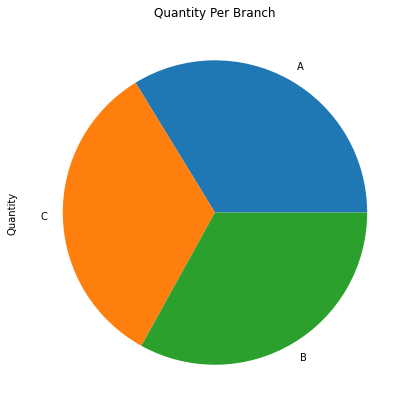

In [25]:
df.groupby('Branch')['Quantity'].sum().sort_values(ascending=False).plot(kind='pie' , title='Quantity Per Branch' , figsize=(8,7))
df.groupby('Branch')['Quantity'].sum().sort_values(ascending=False)

<AxesSubplot: title={'center': 'Total Per Customer_type'}, xlabel='City'>

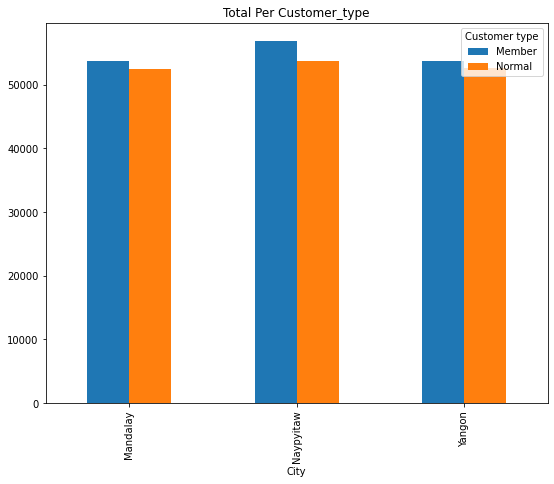

In [34]:
df.pivot_table(index='City',columns='Customer type',values='Total',aggfunc=np.sum).plot(kind='bar',figsize=(9,7),title='Total Per Customer_type')

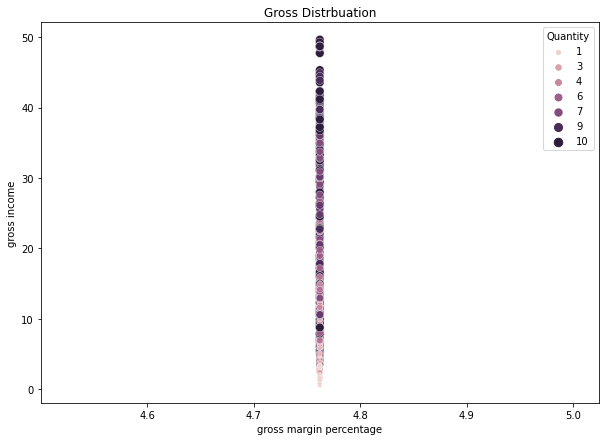

In [44]:
plt.figure(figsize=(10,7))
plt.title('Gross Distrbuation')
sn.scatterplot(data=df , x='gross margin percentage' ,y='gross income',size='Quantity',hue='Quantity')
plt.show()

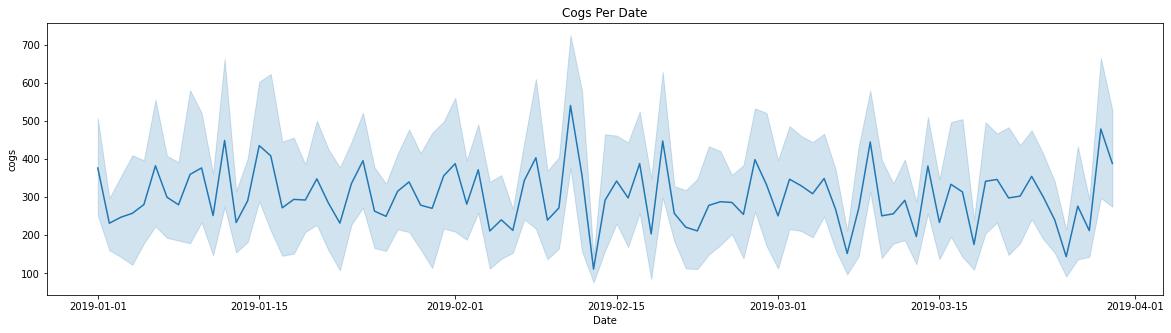

In [50]:
plt.figure(figsize=(20,5))
plt.title('Cogs Per Date')
sn.lineplot(data=df , x='Date' , y='cogs')
plt.show()

In [52]:
df.groupby('Product line')['Rating'].max().sort_values(ascending=False)

Product line
Electronic accessories    10.0
Health and beauty         10.0
Sports and travel         10.0
Fashion accessories        9.9
Food and beverages         9.9
Home and lifestyle         9.9
Name: Rating, dtype: float64

In [61]:
px.bar(data_frame=df , x='Product line' , y='Rating',title='Rating by Product')

In [62]:
px.pie(data_frame=df ,names='Gender' , values='Quantity',title='Quantity by Gender')

<AxesSubplot: title={'center': 'Total Sales By Time'}, xlabel='Time'>

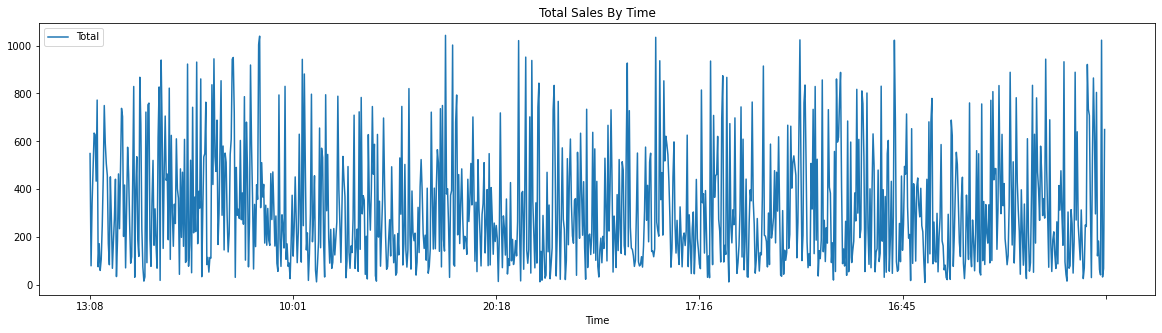

In [97]:
df.plot(x='Time',y='Total',kind='line',figsize=(20,5),title='Total Sales By Time')

In [65]:
px.area(data_frame=df,x='Date' , y='gross income' ,title='Gross By Time')

In [68]:
df.pivot_table(index='Payment' , values='Tax 5%',aggfunc=np.sum).sort_values(by='Tax 5%',ascending=False)

,Tax 5%
Payment,
Cash,5343.170
Ewallet,5237.767
Credit card,4798.432


<AxesSubplot: title={'center': 'Paayment Taxes'}, ylabel='Payment'>

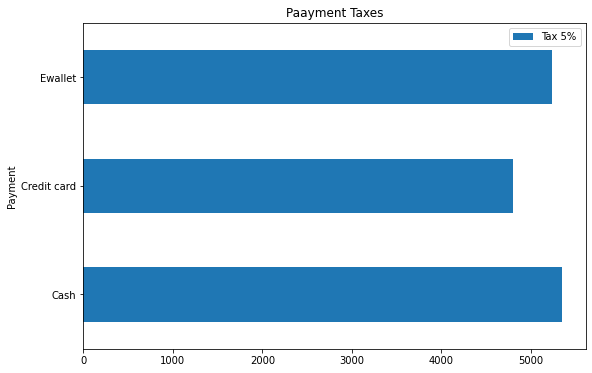

In [73]:
df.pivot_table(index='Payment' , values='Tax 5%',aggfunc=np.sum).plot(kind='barh',title='Paayment Taxes' ,figsize=(9,6))

In [106]:
px.pie(data_frame=df ,names='Branch' , values='gross margin percentage',title='GMP by Branch')

In [77]:
df.pivot_table(index='Product line',values={'Quantity','Unit price'},aggfunc=np.sum).round(1).sort_values(by='Quantity',ascending=False)

,Quantity,Unit price
Product line,,
Electronic accessories,971,9103.8
Food and beverages,952,9745.5
Sports and travel,920,9460.9
Home and lifestyle,911,8850.7
Fashion accessories,902,10173.4
Health and beauty,854,8337.9


In [ ]:
df.plot(x='Product line',y={'Quantity','Unit price'},kind='bar')

In [92]:
px.scatter(data_frame=df ,x='Quantity' , y='Unit price',hover_name='Product line',size='Quantity',title='Distrbution Quantity&Price per Product line')

In [93]:
df.corr().round(1)

C:\Users\AS\AppData\Local\Temp\ipykernel_17276\162838519.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.0,0.0,0.6,0.6,0.6,NaN,0.6,-0.0
Quantity,0.0,1.0,0.7,0.7,0.7,NaN,0.7,-0.0
Tax 5%,0.6,0.7,1.0,1.0,1.0,NaN,1.0,-0.0
Total,0.6,0.7,1.0,1.0,1.0,NaN,1.0,-0.0
cogs,0.6,0.7,1.0,1.0,1.0,NaN,1.0,-0.0
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.6,0.7,1.0,1.0,1.0,NaN,1.0,-0.0
Rating,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,-0.0,1.0
